In [2]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u

In [6]:
#Todo: so far have payed no attention to significant digits
#TODO: this is just with the M0 map outside range - Vsys


outflow_ID_lowmass=['Oph_12_blue', 'Oph_12_red', 'Oph_26_blue', 'Oph_26_red', 'Oph_27_blue', 'Oph_27_red',  'Oph_29_red', 'Oph_31_red',\
                     'Oph_34_blue', 'Oph_34_red', 'Oph_39_blue', 'Oph_39_red']

radius_lowmass = [893.8, 969.5, 727.3, 604.8, 539.3, 263.1, 847.6, 757.7, 816.7, 281.7, 985.7, 406.3] *u.AU
e_radius_lowmass = [191.1, 194.8, 184.1, 179.6, 177.5, 171.1 , 189.4, 185.7, 188.7, 172.4, 198.6, 177.2 ] *u.AU

deltaV_lowmass = np.array([7.0, 7.1, 10.6, 8.7, 15.2, 9.5, 3.1, 6.3, 11.9, 2.4, 7.8, 7.9 ]) *u.km / u.s
e_deltaV_lowmass = np.square(np.sqrt(0.05 * deltaV_lowmass) + np.sqrt(0.08 *u.km / u.s)) 

t_dyn_lowmass = (radius_lowmass / deltaV_lowmass).to(u.yr)
e_t_dyn_lowmass = np.sqrt(np.square(e_radius_lowmass/deltaV_lowmass)+np.square(radius_lowmass * e_deltaV_lowmass/ deltaV_lowmass **2)).to(u.yr)


outflow_ID_highmass = ['G008.67_blue_A', 'G008.67_red_A', 'G008.67_blue_B', 'G008.67_red_B', 'G328.25_blue', 'G328.25_red', 'G337.92_blue', \
                       'G337.92_red', 'G338.93_red_A', 'G338.93_red_B','G338.93_red_C', 'G351.77_red_A', 'G351.77_red_B']

radius_highmass = [5.049e+04, 3.297e+04, 5.049e+04, 1.93e+04, 3.511e+04, 2.653e+04, 4.765e+04, 4.207e+04, 3.627e+04, 5.765e+04, 4.68e+03, 1.475e+04, 2.739e+04]*u.AU
e_radius_highmass = [5.796e+03, 4.355e+03, 5.796e+03, 4.355e+03, 3.914e+03, 3.166e+03, 5.172e+03, 4.664e+03, 4.554e+03, 6.389e+03, 2.793e+03, 2.508e+03, 3.408e+03]*u.AU

deltaV_highmass = np.array([64.0, 38.9, 53.8, 36.4, 74.1, 69.4, 86.6, 83.6, 50.6, 90.0, 35.4,  1.29e+02, 1.05e+02])*u.km / u.s
e_deltaV_highmass = np.square(np.sqrt(0.05 * deltaV_highmass) + np.sqrt(1.3*u.km / u.s))

t_dyn_highmass = (radius_highmass / deltaV_highmass).to(u.yr)
e_t_dyn_highmass = np.sqrt(np.square(e_radius_highmass/deltaV_highmass)+np.square(radius_highmass * e_deltaV_highmass/ deltaV_highmass **2)).to(u.yr)

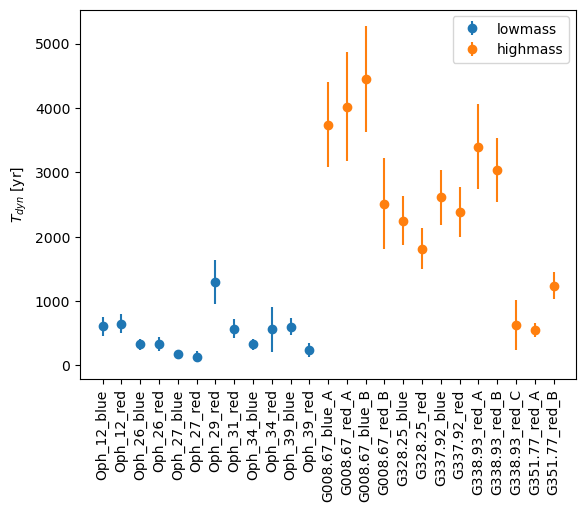

In [7]:
plt.errorbar(outflow_ID_lowmass,t_dyn_lowmass, yerr=e_t_dyn_lowmass, fmt='o', label='lowmass')
plt.errorbar(outflow_ID_highmass,t_dyn_highmass, yerr=e_t_dyn_highmass, fmt='o', label='highmass')
plt.legend()
plt.xticks(rotation=90)
plt.ylabel(r'$T_{dyn}$ [yr]')
plt.show()

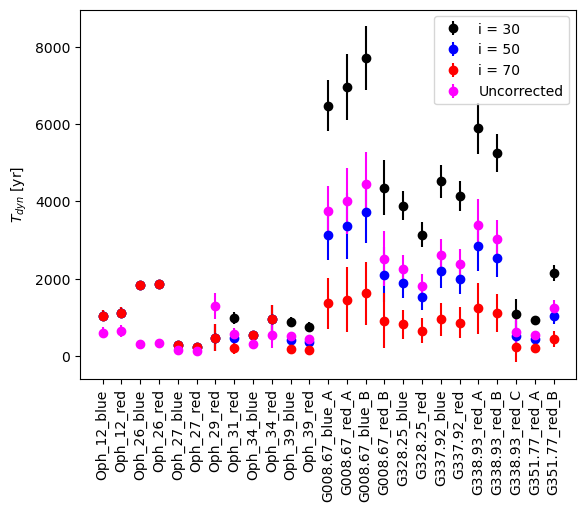

In [5]:
"""  
We account for the inclination: multiply with tan(i) where it is known, with tan(i) where it is unknown, take i=30,50,70


Actually, do same calculation
Vdmarel: i=90 for plane of sky, i=0 for pole-on
Then Robs = True sin(i)
Vobs = Vtrue cos(i)
Tobs = Ttrue * tan(i)
Ttrue = Tobs/tan(i)


"""
i=30
inclinations_low = np.array([30,30,10,10,30,30,70,i,30,30,i,i])* u.deg
inclinations_high=np.ones(len(outflow_ID_highmass)) * i * u.deg
plt.errorbar(outflow_ID_lowmass,t_dyn_lowmass / np.tan(inclinations_low), yerr=e_t_dyn_lowmass, fmt='o', label='i = 30', color='black')
plt.errorbar(outflow_ID_highmass,t_dyn_highmass / np.tan(inclinations_high), yerr=e_t_dyn_highmass, fmt='o', color='black')

i=50
inclinations_low = np.array([30,30,10,10,30,30,70,i,30,30,i,i])* u.deg
inclinations_high=np.ones(len(outflow_ID_highmass)) * i * u.deg
plt.errorbar(outflow_ID_lowmass,t_dyn_lowmass / np.tan(inclinations_low), yerr=e_t_dyn_lowmass, fmt='o', label='i = 50', color='blue')
plt.errorbar(outflow_ID_highmass,t_dyn_highmass / np.tan(inclinations_high), yerr=e_t_dyn_highmass, fmt='o', color='blue')

i=70
inclinations_low = np.array([30,30,10,10,30,30,70,i,30,30,i,i])* u.deg
inclinations_high=np.ones(len(outflow_ID_highmass)) * i * u.deg
plt.errorbar(outflow_ID_lowmass,t_dyn_lowmass / np.tan(inclinations_low), yerr=e_t_dyn_lowmass, fmt='o', label='i = 70', color='red')
plt.errorbar(outflow_ID_highmass,t_dyn_highmass / np.tan(inclinations_high), yerr=e_t_dyn_highmass, fmt='o', color='red')


plt.errorbar(outflow_ID_lowmass,t_dyn_lowmass, yerr=e_t_dyn_lowmass, fmt='o', label='Uncorrected', color='magenta')
plt.errorbar(outflow_ID_highmass,t_dyn_highmass, yerr=e_t_dyn_highmass, fmt='o', color='magenta')

# plt.errorbar(outflow_ID_highmass,t_dyn_highmass, yerr=e_t_dyn_highmass, fmt='o', label='highmass')
plt.legend()
plt.xticks(rotation=90)
plt.ylabel(r'$T_{dyn}$ [yr]')
plt.show()